## Exercise 1: Housing

In [252]:
import pandas as pd
house = pd.read_csv('Housing.csv')
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [253]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [254]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [255]:
#chia price cho 10^6
house['price_mil'] = house['price']/1e6

In [256]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking,price_mil
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,13.300000


In [257]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'price_mil'],
      dtype='object')

<AxesSubplot:>

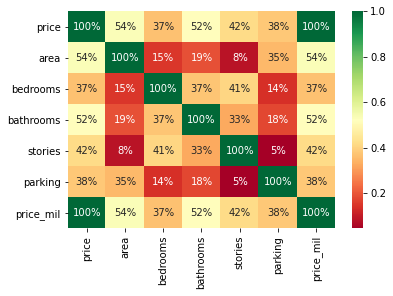

In [258]:
import seaborn as sns
# Lastly let us plot a corrlation map between each variable
# here the corr() function will plot a correlation map easily

sns.heatmap(house.corr(),annot=True,fmt=".0%",cmap="RdYlGn")

In [259]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_mil
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.300
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.250
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.250
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.215
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.410


In [260]:
#Dung mo hinh linear regression
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
results = smf.ols('price_mil ~ area + bedrooms + bathrooms + stories + mainroad +\
       guestroom + basement + hotwaterheating + airconditioning + parking + prefarea + furnishingstatus', 
                  data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_mil   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          9.07e-123
Time:                        08:22:59   Log-Likelihood:                -802.05
No. Observations:                 545   AIC:                             1632.
Df Residuals:                     531   BIC:                             1692.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [261]:
#adjust R Sqr =  0.674 -> 67.4% cac bien duoc giai thich boi mo hinh
#bedroom va furnishingstatus co pvalue = 0.691 va 0.114  > 0.05 -> reject H0- > 2 bien nay khong co moi quan he tuyen tinh voi price_mil -> loai khoi mo hinh

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
results = smf.ols('price_mil ~ area  + bathrooms + stories + mainroad +\
       guestroom + basement + hotwaterheating + airconditioning + parking + prefarea ', 
                  data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_mil   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          4.30e-122
Time:                        08:30:06   Log-Likelihood:                -810.89
No. Observations:                 545   AIC:                             1644.
Df Residuals:                     534   BIC:                             1691.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [ ]:
#coef batrooms = 1.0471 ? bathroom tang len 1 thi price tang len 1.047 mil

In [268]:
from patsy import dmatrices
#predicting the pizza price with the final model
y,X=dmatrices('price_mil ~ area  + bathrooms + stories + mainroad +\
       guestroom + basement + hotwaterheating + airconditioning + parking + prefarea' ,
              house,return_type="dataframe")
model = LinearRegression()
model = model.fit(X,y)
Y_Pred = model.predict(X)
print(Y_Pred[:5])
print(y[:5])

[[ 8.00807233]
 [10.63134479]
 [ 7.68112147]
 [ 8.2467856 ]
 [ 6.52351165]]
   price_mil
0     13.300
1     12.250
2     12.250
3     12.215
4     11.410


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


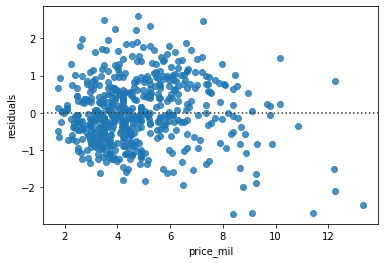

In [269]:
import matplotlib.pyplot as plt
ax12=sns.residplot(y,Y_Pred)
ax12.set_ylabel('residuals')
plt.show()

In [ ]:
# gia nha tu 2 den 8 tr -> mo hinh du bao tuong doi tot, price > 8tr: mo hinh du bao sai lech nhieu

In [270]:
residuals = Y_Pred - y
residuals=residuals.rename(columns={'price_mil':'residuals'})

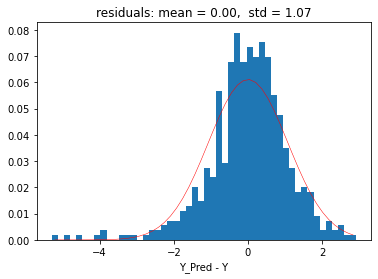

In [271]:
import numpy as np
import scipy.stats as stats
#plotting residual distribution 
# Bin
n, bin_edges = np.histogram(residuals, 50)
# Normalize it, so that every bins value gives the probability of that bin
bin_probability = n/float(n.sum())
# Get the mid points of every bin
bin_middles = (bin_edges[1:]+bin_edges[:-1])/2.
# Compute the bin-width
bin_width = bin_edges[1]-bin_edges[0]
# Plot the histogram of residuals
plt.bar(bin_middles, bin_probability, width=bin_width)


# Fit to normal distribution
(mu, sigma) = stats.norm.fit(residuals)
std = residuals.std()
#plotting normal curve  
y = stats.norm.pdf(bin_middles, mu, sigma)*bin_width
l = plt.plot(bin_middles, y, 'r', linewidth=0.5)

plt.title( "residuals: mean = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Y_Pred - Y')
plt.show()

In [ ]:
#Lasso, rigde regression -> ho nha linear. 
#linear y = a1x1 + a2x2 +...+ b
#Lasso y = a1x1 + a2x2 +...+ b + aplpha (alpha -> giam residuals)

## Exercise 2 : Marketing campaign trong bank

In [272]:
import pandas as pd
bank = pd.read_csv('bank-full.csv')
bank.head()
#y -> co uu dai hay khong cho khach hang 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [273]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [274]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Dung mo hinh logistic regression

In [275]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [276]:
bank['y_le'] = le.fit_transform(bank['y']) 
bank['job_le'] = le.fit_transform(bank['job']) 
bank['marital_le'] = le.fit_transform(bank['marital']) 
bank['education_le'] = le.fit_transform(bank['education'])
bank['default_le'] = le.fit_transform(bank['default'])
bank['housing_le'] = le.fit_transform(bank['housing'])
bank['loan_le'] = le.fit_transform(bank['loan'])
bank['poutcome_le'] = le.fit_transform(bank['poutcome'])
bank['contact_le'] = le.fit_transform(bank['contact'])
bank['month_le'] = le.fit_transform(bank['month'])

In [277]:
bank.groupby('y_le').mean()

,age,balance,day,duration,campaign,pdays,previous,job_le,marital_le,education_le,default_le,housing_le,loan_le,poutcome_le,contact_le,month_le
y_le,,,,,,,,,,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154,4.291594,1.157632,1.206778,0.019112,0.581008,0.169330,2.587997,0.688743,5.549797
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354,4.703347,1.243902,1.360938,0.009832,0.365854,0.091511,2.348459,0.274154,5.320855


In [278]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_le', 'job_le', 'marital_le',
       'education_le', 'default_le', 'housing_le', 'loan_le', 'poutcome_le',
       'contact_le', 'month_le'],
      dtype='object')

In [279]:
y, X = dmatrices('y_le ~ age + month_le + job_le + marital_le + education_le + default_le + contact_le + \
    housing_le + loan_le + poutcome_le + balance + day + duration + campaign + pdays',
                  bank, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'age', 'month_le', 'job_le', 'marital_le', 'education_le',
       'default_le', 'contact_le', 'housing_le', 'loan_le', 'poutcome_le',
       'balance', 'day', 'duration', 'campaign', 'pdays'],
      dtype='object')


In [280]:
import statsmodels.api as sm
model = sm.Logit(y,X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.268647
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   y_le   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:                  0.2556
Time:                        08:47:38   Log-Likelihood:                -12146.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.8441      0.145    -26.546      0.000      -4.128      -3.560
age              0.0086

In [281]:
y, X = dmatrices('y_le ~ age + marital_le + education_le + default_le + contact_le + \
    housing_le + loan_le + poutcome_le + balance + duration + campaign + pdays',
                  bank, return_type="dataframe")

In [282]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [283]:
model.score(X, y) #tinh accuracy cua mo hinh 

0.8890093118931234

<AxesSubplot:>

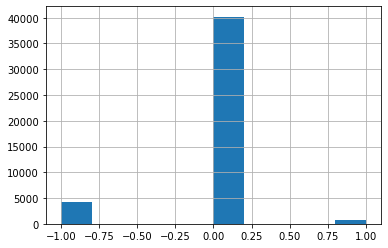

In [284]:
Y_Pred = model.predict(X)
Y_Pred = pd.DataFrame(Y_Pred)
residuals = Y_Pred[0] - y['y_le']
residuals.hist()

In [285]:
probs = model.predict_proba(X)
print(probs[:10])
print(Y_Pred[:10])
#threshold = 0.5

[[0.9755781  0.0244219 ]
 [0.98598078 0.01401922]
 [0.98713512 0.01286488]
 [0.98563822 0.01436178]
 [0.96687555 0.03312445]
 [0.9811608  0.0188392 ]
 [0.98205958 0.01794042]
 [0.9477414  0.0522586 ]
 [0.98925319 0.01074681]
 [0.98990568 0.01009432]]
     0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0
5  0.0
6  0.0
7  0.0
8  0.0
9  0.0


In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [287]:
predicted = model.predict(X_test)

In [288]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

[[11709   260]
 [ 1284   311]]


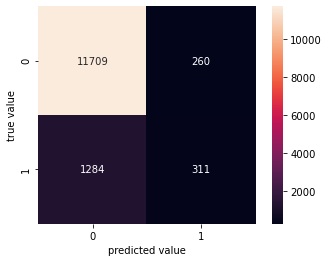

In [289]:
cf_matrix = confusion_matrix(y_test, predicted)
print(cf_matrix)
sns.heatmap(cf_matrix,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [290]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     11969
         1.0       0.54      0.19      0.29      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.59      0.61     13564
weighted avg       0.86      0.89      0.86     13564



<AxesSubplot:>

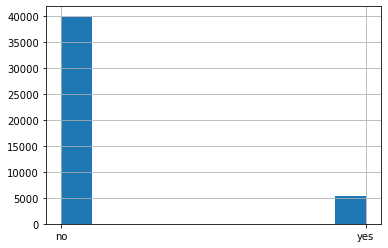

In [291]:
bank['y'].hist()

In [ ]:
# logistic model -> rat kem cho phan loai yes. Chi tot phan loai no

## Exercise 3: improve predicting exercise 2

In [ ]:
#tree based model, bayesian

In [292]:
feature_cols = ['age', 'balance', 'day','month_le', 'duration', 'campaign', 'pdays', 'contact_le',
       'previous', 'job_le', 'marital_le','education_le', 'default_le', 'housing_le', 'loan_le', 'poutcome_le'] # bo sung truong weekday
X = bank[feature_cols]
y = bank ['y_le']
X[:5]

,age,balance,day,month_le,duration,campaign,pdays,contact_le,previous,job_le,marital_le,education_le,default_le,housing_le,loan_le,poutcome_le
0,58,2143,5,8,261,1,-1,2,0,4,1,2,0,1,0,3
1,44,29,5,8,151,1,-1,2,0,9,2,1,0,1,0,3
2,33,2,5,8,76,1,-1,2,0,2,1,1,0,1,1,3
3,47,1506,5,8,92,1,-1,2,0,1,1,3,0,1,0,3
4,33,1,5,8,198,1,-1,2,0,11,2,3,0,0,0,3


In [ ]:
#feature engineering -> important feature -> tim ra cac bien quan trong va loai bo cac bien khong quan trong

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [294]:
from sklearn.ensemble import RandomForestClassifier
# Create Decision Tree classifer object
clf = RandomForestClassifier() #clf: classifier

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [295]:
import numpy as np
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis =0)
indices = np.argsort(importances)[::1]

print("Feature ranking:")
for f in range (X_train.shape[1]):
    print("%d. feature %s (%f)" % (f+1, X.columns[indices[f]],importances[indices[f]]))

Feature ranking:
1. feature default_le (0.001730)
2. feature loan_le (0.009557)
3. feature contact_le (0.020383)
4. feature marital_le (0.022129)
5. feature previous (0.022308)
6. feature housing_le (0.024745)
7. feature education_le (0.028192)
8. feature campaign (0.038450)
9. feature poutcome_le (0.047050)
10. feature job_le (0.048584)
11. feature pdays (0.049106)
12. feature month_le (0.087216)
13. feature day (0.090400)
14. feature age (0.105966)
15. feature balance (0.109695)
16. feature duration (0.294487)


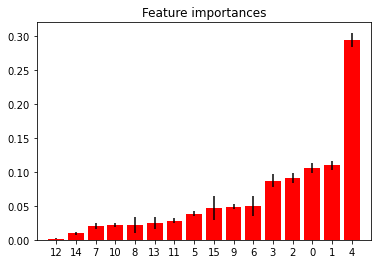

In [296]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [298]:
feature_cols = ['age', 'balance', 'day','month_le', 'duration']
X = bank[feature_cols]
y = bank ['y_le']

In [299]:
X[:5]

,age,balance,day,month_le,duration
0,58,2143,5,8,261
1,44,29,5,8,151
2,33,2,5,8,76
3,47,1506,5,8,92
4,33,1,5,8,198


In [300]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier # Import RandomForest + Gradient
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

DecisionTreeClassifier() 3.6438117027282715
RandomForestClassifier() 142.70273685455322


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 418, in fit
    y = self._validate_y(y, sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 1101, in _validate_y
    raise ValueError("y contains %d class after sample_weight "
ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validat

GradientBoostingClassifier() 120.09638285636902


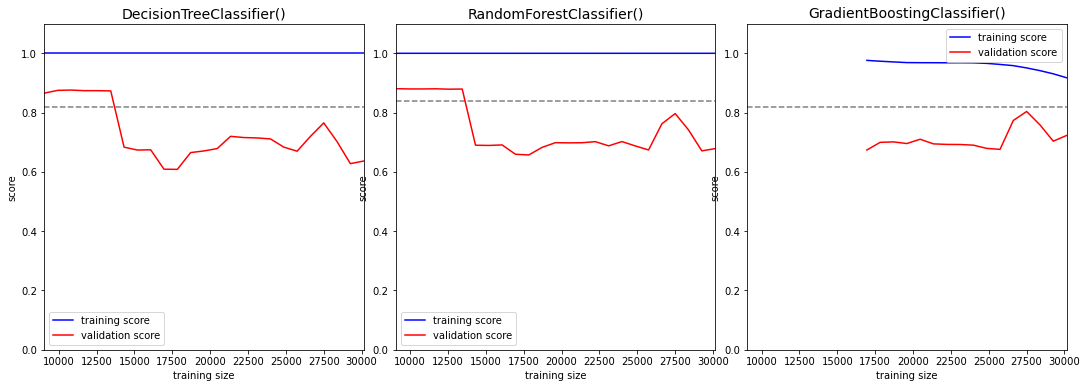

In [301]:
from sklearn.model_selection import learning_curve
import time
fig, ax = plt.subplots(1, 3, figsize=(16, 6)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
models = [DecisionTreeClassifier(), RandomForestClassifier(),GradientBoostingClassifier()]

for i, model in enumerate(models):
    start = time.time()
    N, train_lc, val_lc = learning_curve(model,
                                     X, y, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 25)) #cv=3: cat dataset 3 lan, moi lan train va test tren nhung data point khac nhau
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1.1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('{}'.format(model), size=14)
    ax[i].legend(loc='best')
    end = time.time()
    print(model,f"{end - start}")

In [303]:
from sklearn.naive_bayes import GaussianNB #bayesian classifiers

GaussianNB() 1.097917079925537


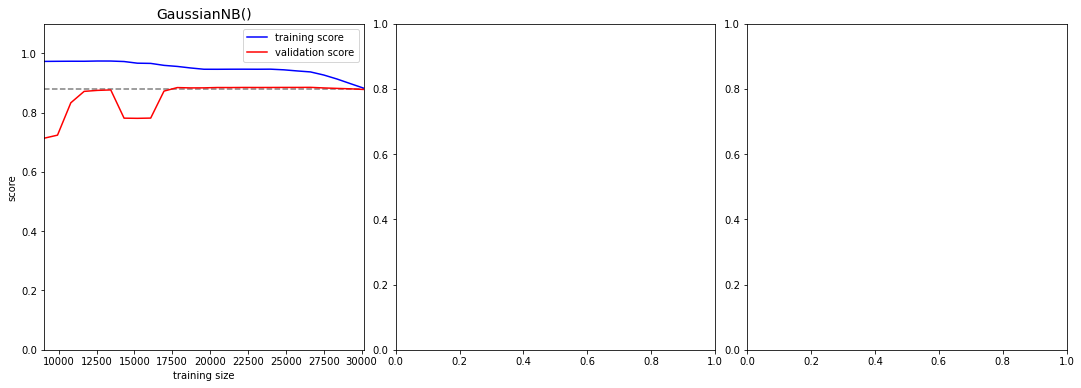

In [304]:
from sklearn.model_selection import learning_curve
import time
fig, ax = plt.subplots(1, 3, figsize=(16, 6)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
models = [GaussianNB()]
for i, model in enumerate(models):
    start = time.time()
    N, train_lc, val_lc = learning_curve(model,
                                     X, y, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 25)) #cv=3: cat dataset 3 lan, moi lan train va test tren nhung data point khac nhau
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1.1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('{}'.format(model), size=14)
    ax[i].legend(loc='best')
    end = time.time()
    print(model,f"{end - start}")

# Choose Decision Tree

In [305]:
model = DecisionTreeClassifier()
model = model.fit(X, y)

In [306]:
13000/45000

0.28888888888888886

In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [310]:
predicted = model.predict(X_test)

In [311]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

[[25626  2352]
 [ 2182  1488]]


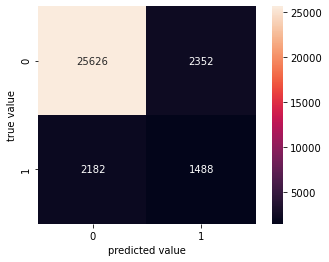

In [312]:

cf_matrix = confusion_matrix(y_test, predicted)
print(cf_matrix)
sns.heatmap(cf_matrix,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [313]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     27978
           1       0.39      0.41      0.40      3670

    accuracy                           0.86     31648
   macro avg       0.65      0.66      0.66     31648
weighted avg       0.86      0.86      0.86     31648



# Choose GaussianNB

In [314]:
model = GaussianNB()
model = model.fit(X, y)

In [315]:
18000/45000

0.4

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state = 0)
model.fit(X_train, y_train)

GaussianNB()

In [319]:
predicted = model.predict(X_test)

In [320]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

[[22891  1090]
 [ 2278   868]]


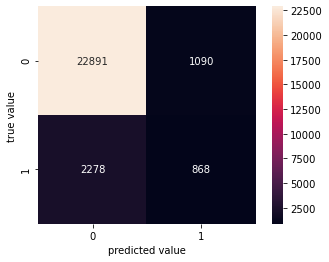

In [321]:
cf_matrix = confusion_matrix(y_test, predicted)
print(cf_matrix)
sns.heatmap(cf_matrix,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [322]:
# Bayesian
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     23981
           1       0.44      0.28      0.34      3146

    accuracy                           0.88     27127
   macro avg       0.68      0.62      0.64     27127
weighted avg       0.86      0.88      0.86     27127



In [313]:
# Decision Tree
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     27978
           1       0.39      0.41      0.40      3670

    accuracy                           0.86     31648
   macro avg       0.65      0.66      0.66     31648
weighted avg       0.86      0.86      0.86     31648



In [ ]:
# final model Decision Tree